---------------------------------------------------------------------------------------------------------------------------
Removing the Outliers using Normal Distribution and Z-Score
---------------------------------------------------------------------------------------------------------------------------

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
data = pd.read_csv("scholarship.csv")
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [28]:
df = data.copy()
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [29]:
df.shape

(1000, 3)

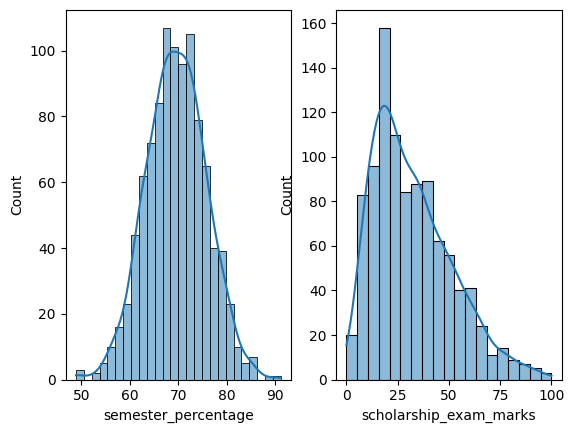

In [30]:
plt.subplot(1,2,1)  #(row 1, columns 2, 1st subplot)
sns.histplot(df['semester_percentage'], kde = True)
plt.subplot(1,2,2)  #(row 1, columns 2, 2nd subplot)
sns.histplot(df["scholarship_exam_marks"], kde = True)
plt.show()

In [31]:
mean = df['semester_percentage'].mean()
sdt = df['semester_percentage'].std()

In [32]:
print(mean, "," , sdt)

69.6124 , 6.158978751323897


In [33]:
highest_allowed = mean  + 3*sdt 
lowest_allowed  = mean - 3*sdt
print(highest_allowed, ",", lowest_allowed)


88.08933625397168 , 51.13546374602831


In [34]:
#Detecting the outliers using Normal Distribution
df[(df["semester_percentage"]<lowest_allowed) | (df["semester_percentage"]>highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [35]:
#detecting the outliers using Z-score
df['z_score_Sem_perctge'] = (df['semester_percentage']-df['semester_percentage'].mean())/(df['semester_percentage'].std())

In [36]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score_Sem_perctge
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


Trimming the outliers


In [37]:
#Removing the outliers
df[(df['semester_percentage']<highest_allowed) & (df['semester_percentage']>lowest_allowed)]


,semester_percentage,scholarship_exam_marks,got_scholarship,z_score_Sem_perctge
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


Capping - I dont want to Trim those outliers instead I will add some useful values

Capping means any values that are lesser than lower_limit those values will changed to lower_limit value.

Similarly any value that is greater than upper_limit those values will be changed to upper_limit value.

In [40]:
upper_limit = mean+3*sdt
lower_limit = mean -3*sdt
print(lower_limit, ",", upper_limit)

51.13546374602831 , 88.08933625397168


In [46]:
#np.where(condition, x, y)  checks the condition if it's true prints x; else prints y
df['semester_percentage'] = np.where(df['semester_percentage']>upper_limit, upper_limit, 
                                    np.where(df['semester_percentage']<lower_limit, lower_limit,df['semester_percentage']))

In [47]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score_Sem_perctge
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [45]:
#Now after Capping checking the presence of Outliers
df[(df['semester_percentage']>upper_limit) | (df['semester_percentage']<lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score_Sem_perctge


---------------------------------------------------------------------------------------------------------------------------
Handling the outliers using Interquartile Range(IQR) 
---------------------------------------------------------------------------------------------------------------------------

NOTE: IQR is used when we have skewed distribution

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
data = pd.read_csv("scholarship.csv")
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [50]:
df= data.copy()

In [51]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


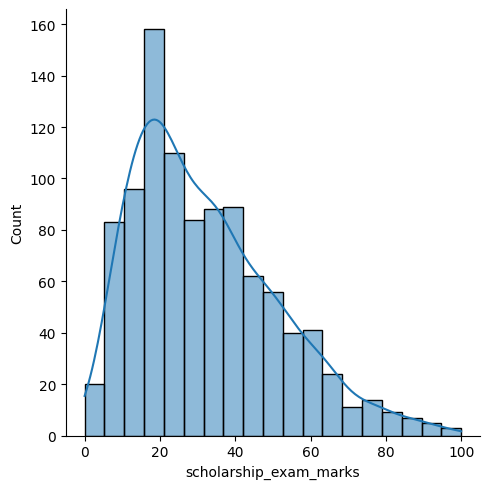

In [ ]:
sns.displot(data['scholarship_exam_marks'], kde = True)
#It is a skew distribution

<Axes: ylabel='scholarship_exam_marks'>

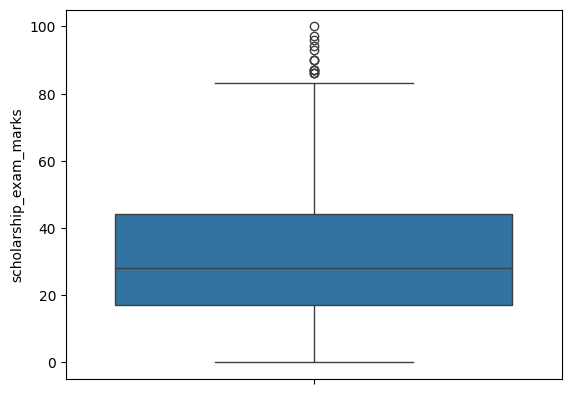

In [55]:
sns.boxplot(df['scholarship_exam_marks'])

In [56]:
#Finding the Quartiles
Q1 = df['scholarship_exam_marks'].quantile(0.25)
Q3 = df['scholarship_exam_marks'].quantile(0.75)

In [70]:
print(Q1,Q3)

17.0 44.0


In [71]:
IQR = Q3 - Q1
IQR

27.0

In [73]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [74]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
print(min, max)

-23.5 84.5


In [ ]:
#Finding the outliers using the Quartiles
df[(df['scholarship_exam_marks']<min) | (df['scholarship_exam_marks']>max)]
#15 rows having the outliers

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [84]:
# Now we have 2 options 
#1. Trimming - cutting all the values that are outliers
#2. Capping - Adding some useful values to the outliers So that It can contribute to the Analysis.

Trimming


In [77]:
#printing the data without the outliers
df[(df['scholarship_exam_marks']<max) & (df['scholarship_exam_marks']>min)]
#985 rows has no outliers

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [83]:
new_df = df[(df['scholarship_exam_marks']<max) & (df['scholarship_exam_marks']>min)]
new_df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


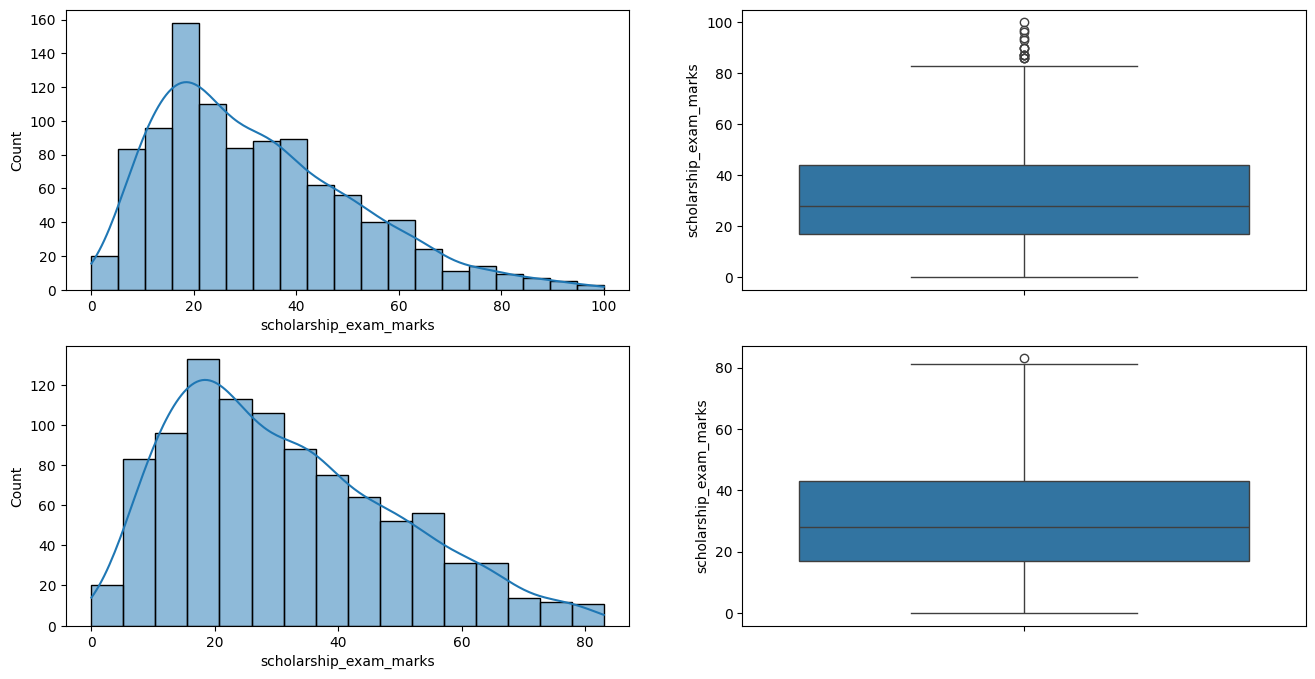

In [94]:
plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
sns.histplot(df['scholarship_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['scholarship_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['scholarship_exam_marks'], kde = True)

plt.subplot(2,2,4)
sns.boxplot(new_df['scholarship_exam_marks'])

plt.show()

Capping

In [97]:
df['scholarship_exam_marks'] = np.where(df['scholarship_exam_marks']<min, min, 
                                        np.where(df['scholarship_exam_marks']>max, max, df['scholarship_exam_marks']))
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26.0,1
1,74.6,38.0,1
2,75.4,40.0,1
3,64.2,8.0,1
4,72.3,17.0,0
...,...,...,...
995,88.7,44.0,1
996,91.2,65.0,1
997,48.9,34.0,0
998,86.2,46.0,1


In [99]:
df[(df['scholarship_exam_marks']>max) & (df['scholarship_exam_marks']<min)]

,semester_percentage,scholarship_exam_marks,got_scholarship


<Axes: ylabel='scholarship_exam_marks'>

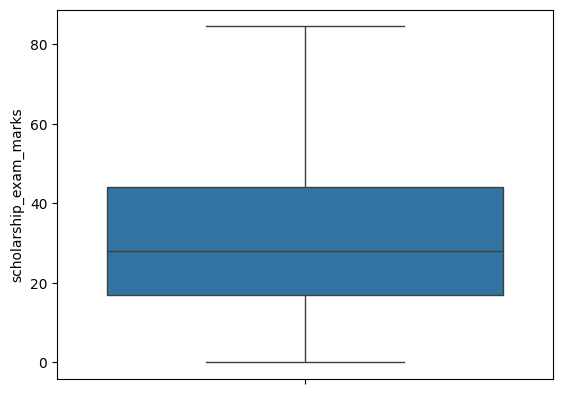

In [101]:
sns.boxplot(df['scholarship_exam_marks'])

---------------------------------------------------------------------------------------------------------------------------
Handling the Outliers using Percentile
---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#This is also similar like IQR and Z-Score
#There is different in finding the min and max values

#min_limit = df['got_scholarship].quantile(0.01)
#max_limit = df['got_scholarship].quantile(0.99)

#finding the outliers
#df[(df['got_scholarship]>max_limit | df['got_scholarship]<min_limit)]

#Trimming  OR  Capping

#Done

---------------------------------------------------------------------------------------------------------------------------
Correction Of Datatype
---------------------------------------------------------------------------------------------------------------------------


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [104]:
data = pd.read_csv("AB_NYC_2019.csv")

In [106]:
df = data.copy()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#checking the datatype of all the columns
df.info()

# the object data type in pandas usually represents string (text) data. 
# However, it can also contain mixed types, including numbers stored as strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [125]:
#using astype()
df["id"] = df['id'].astype("str")
df["host_id"] = df["host_id"].astype("object")
df["price"] = df["price"].astype("object")
df["last_review"] =  pd.to_datetime(df["last_review"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  object        
 10  minimum_nights                  48895 non-null  int64         
 11  nu